# Student Data
This Notebook analyzes Pass Fail Data for a class

In [1]:
data = [50, 47, 97, 49, 49, 3, 53, 42, 26, 74, 84, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]

In [2]:
import numpy as np
grades = np.array(data)
print(data*2)
print("Grades:", grades)
print(grades*2)
print("Mean:", np.mean(grades))
print("Median:", np.median(grades))
print("Standard Deviation:", np.std(grades))

[50, 47, 97, 49, 49, 3, 53, 42, 26, 74, 84, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64, 50, 47, 97, 49, 49, 3, 53, 42, 26, 74, 84, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]
Grades: [50 47 97 49 49  3 53 42 26 74 84 62 37 15 70 27 36 35 48 52 63 64]
[100  94 194  98  98   6 106  84  52 148 168 124  74  30 140  54  72  70
  96 104 126 128]
Mean: 49.22727272727273
Median: 49.0
Standard Deviation: 21.381665506566854


In [3]:
grades.shape


(22,)

In [4]:
grades[0]  # Accessing the first element of the grades array

np.int64(50)

In [5]:
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]
student_data = np.array([study_hours, grades])

In [6]:
student_data[0]
student_data[1][0]

np.float64(50.0)

In [7]:
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()
print(f"Average Study Time: {avg_study}\nAverage Grade: {avg_grade}")

Average Study Time: 10.522727272727273
Average Grade: 49.22727272727273


In [8]:
import pandas as pd

df_students = pd.DataFrame({'name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 
                                     'Rhonda','Giovanni', 'Francesca','Rajab','Naiyana','Kian','Jenny',
                                     'Jakeem','Helena','Ismat','Anila','Skye','Daniele','Aisha'],
                                     'study_hours': student_data[0], 'grades': student_data[1]})


In [9]:
df_students.loc[5, 'grades']
df_students.loc[5, 'study_hours']
df_students.loc[5]



name           Vicky
study_hours      1.0
grades           3.0
Name: 5, dtype: object

In [10]:
df_students.loc[df_students['name']=='Vicky']

,name,study_hours,grades
5,Vicky,1.0,3.0


In [11]:
df_students.query('name == "Vicky"')

,name,study_hours,grades
5,Vicky,1.0,3.0


In [12]:
df_students[df_students.name == 'Vicky']

,name,study_hours,grades
5,Vicky,1.0,3.0


In [13]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
#df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')       #UnComment this to get CSV file, I have commented it as CSV is already there.
df_students.head()

--2025-08-02 16:51:09--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.


HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv.2’

grades.csv.2        100%[===================>]     322  --.-KB/s    in 0s      

2025-08-02 16:51:10 (19.4 MB/s) - ‘grades.csv.2’ saved [322/322]



,name,study_hours,grades
0,Dan,10.00,50.0
1,Joann,11.50,47.0
2,Pedro,9.00,97.0
3,Rosie,16.00,49.0
4,Ethan,9.25,49.0


In [14]:
df_students

,name,study_hours,grades
0,Dan,10.00,50.0
1,Joann,11.50,47.0
2,Pedro,9.00,97.0
3,Rosie,16.00,49.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


In [15]:
df_students.isnull().sum()

name           0
study_hours    0
grades         0
dtype: int64

Replace Missing value with Avg Value.

In [16]:
df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())

AttributeError: 'DataFrame' object has no attribute 'StudyHours'

In [ ]:
df_students.isnull().sum()

Name          0
StudyHours    0
Grade         2
dtype: int64

In [ ]:
df_students = df_students.dropna(axis=0)

In [ ]:
df_students.isnull().sum()

Name          0
StudyHours    0
Grade         0
dtype: int64

In [ ]:
# Get the mean study hours using ColName as an index
mean_study = df_students['StudyHours'].mean()

# Get the mean grade using the ColName as a property
mean_grade = df_students.Grade.mean()

# Print the mean study hours and mean grade
print('Avg weekly study hours: {:.2f} \nAvg grade: {:.2f}'.format(mean_study, mean_grade))

Avg weekly study hours: 10.52 
Avg grade: 49.18


In [ ]:
# Get the students who studied for the mean or more hours
df_students[df_students.StudyHours > mean_study]

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


In [ ]:
# What was their mean grade?
df_students[df_students.StudyHours > mean_study].Grade.mean()

np.float64(66.7)

In [ ]:
passed = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passed.rename("Passed")], axis=1)

# Axis -> Rows - 0, Col - 1

In [ ]:
df_students.groupby(df_students.Passed).Name.count()


Passed
False    15
True      7
Name: Name, dtype: int64

In [ ]:
df_students.groupby(df_students.Passed).count()

,Name,StudyHours,Grade
Passed,,,
False,15,15,15
True,7,7,7


In [ ]:
print(df_students.groupby(df_students.Passed).Grade.mean())

Passed
False    38.000000
True     73.142857
Name: Grade, dtype: float64


In [ ]:
# df_students.groupby(df_students.Passed)['StudyHours', 'Grade'].mean()
df_students = df_students.sort_values('Grade', ascending=False)

In [ ]:
# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
#df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')       #uncomment this, to read csv

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming 60 is the grade needed to pass
passes = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

# Print the result out into this notebook
df_students

--2025-08-02 16:42:01--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv.3’

grades.csv.3        100%[===================>]     322  --.-KB/s    in 0s      

2025-08-02 16:42:01 (11.9 MB/s) - ‘grades.csv.3’ saved [322/322]



,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


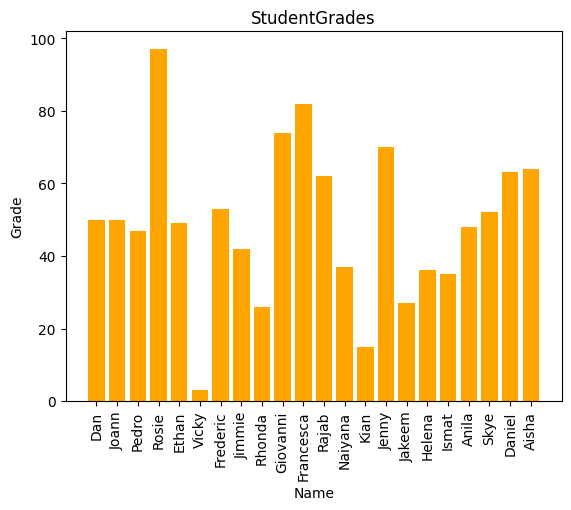

In [ ]:
from matplotlib import pyplot as plt

#fig = plt.figure(figsize=(12.8,7.2))     #to change size of graph


plt.bar(x=df_students.Name, height=df_students.Grade, color="Orange")
plt.title("StudentGrades")
plt.xlabel("Name")
plt.ylabel("Grade")
plt.xticks(rotation=90)

plt.show()



AttributeError: 'DataFrame' object has no attribute 'Name'

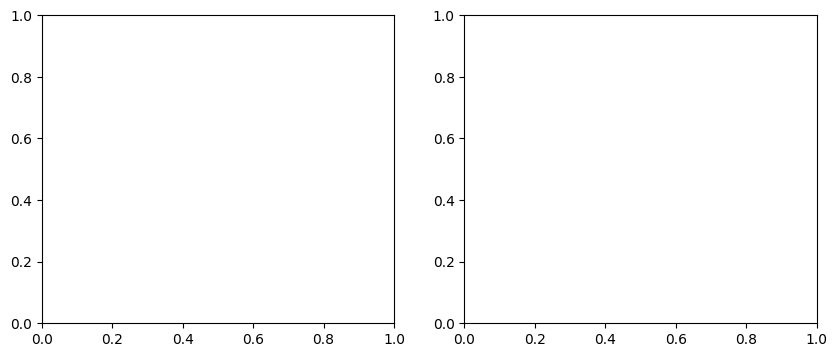

In [ ]:

from matplotlib import pyplot as plt

#fig = plt.figure(figsize=(12.8,7.2))     #to change size of graph
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].bar(x=df_students.Name, height=df_students.Grade, color="Orange")
ax[0].set_title("StudentGrades")
ax[0].set_xticklabel(df_students.Name, rotation=90)

pass_count = df_students.Pass.value_counts()
ax[1].pie(pass_count, labels = pass_count)
ax[1].set_title("Passing Grades")


fig.show()